In [1]:
from pysal.lib import weights
from pysal.explore import esda
import numpy as np
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily
import osmnx as ox
from pysal.model import spreg
from pysal.lib import weights
from scipy import stats

# import libraries

C:\Users\Eddie\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<string>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
c:\Use

In [2]:
db2 = db2.rename(columns={'DN': 'LC'})
print(db2)

             fid  LC                                           geometry
0              1  71  POLYGON ((-113.00400 34.13831, -113.00388 34.1...
1              2  71  POLYGON ((-112.99723 34.13932, -112.99717 34.1...
2              3  52  POLYGON ((-112.99529 34.13960, -112.99518 34.1...
3              4  71  POLYGON ((-112.99465 34.13970, -112.99459 34.1...
4              5  52  POLYGON ((-112.99239 34.14003, -112.99233 34.1...
...          ...  ..                                                ...
1441428  1441429  71  POLYGON ((-110.19106 32.53502, -110.19074 32.5...
1441429  1441430  71  POLYGON ((-110.18946 32.53876, -110.18914 32.5...
1441430  1441431  71  POLYGON ((-110.17445 32.53657, -110.17440 32.5...
1441431  1441432  71  POLYGON ((-110.16968 32.53717, -110.16964 32.5...
1441432  1441433  52  POLYGON ((-110.73803 33.37302, -110.73771 33.3...

[1441433 rows x 3 columns]


In [ ]:
# Create a GeoDataFrame
data1 = db
data2 = db3
data3 = db2
data4 = data

data4["geometry"] = gpd.points_from_xy(data4["Long"], data4["Lat"])
query = {'city': 'phoenix'}

# get the boundaries of the place (add additional buffer around the query)
boundaries = ox.geocode_to_gdf(query, buffer_dist=5000)
boundaries = boundaries.to_crs('EPSG:4326')

# Filter data geographically
data1 = gpd.sjoin(data1, boundaries[["geometry"]])
data1 = data1.reset_index(drop=True)
data1 = data1.drop(['index_right'], axis=1)
data2 = gpd.sjoin(data2, data1)
data2 = data2.reset_index(drop=True)
data2 = data2.drop(['index_right'], axis=1)
data3 = gpd.sjoin(data3, data2)
data3 = data3.reset_index(drop=True)
data3 = data3.drop(['index_right'], axis=1)
data4 = gpd.sjoin(data4, data3)
data4 = data4.reset_index(drop=True)
data4 = data4.drop(['index_right'], axis=1)

# aggregated add DATA 2

# Perform a spatial join on the second larger shapefile and append the results to the joined_shp1
data4.to_file('../datasets/joined_shapefile.shp')

# Check the first rows
#print(data1.head())
#m1 = data3.explore(column="P", cmap="Reds", scheme="quantiles", k=4, tooltip=["popsqmi"], vmax=1000, tiles="CartoDB Positron")

#p = boundaries.explore()
#p.save('1.html')
#m1.save('map1.html')

variable_names = [
    "popsqmi",  # population/ Sq Mi
    "SECTOR_NAM",  # Number of bathrooms
]

C:\Users\Eddie\AppData\Local\Temp\ipykernel_25472\3423274625.py:31: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  data4.to_file('../datasets/joined_shapefile.shp')


MemoryError: Unable to allocate 7.47 GiB for an array with shape (72, 13927980) and data type object

In [49]:
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pyproj
from shapely import wkt

# Combine both the model ouputs and desired regressors.

polygon = pd.read_csv('../../Datasets/Polygon/percentages.csv')
polygon1 = pd.read_csv('../../Datasets/Polygon/percentages2.csv')
print(polygon.columns)
polygon = polygon.drop(columns=['num', 'Est P', 'Max Temp', 'Avg Temp', 'D', 'C', 'mu', 'mu/C',
       'geometry'], axis=1)
polygon = pd.concat([polygon, polygon1], axis=1)
polygon['geometry'] = polygon['geometry'].apply(wkt.loads)

# create a GeoDataFrame from the DataFrame
df = gpd.GeoDataFrame(polygon, geometry='geometry', crs=pyproj.CRS('EPSG:4326'))
cities = ['Phoenix, Arizona, USA', 'Chandler, Arizona, USA', 'Scottsdale, Arizona, USA',
          'Mesa, Arizona, USA', 'Tempe, Arizona, USA', 'Avondale, Arizona, USA', 'Peoria, Arizona, USA', 'Sun City, Arizona, USA'
          , 'Glendale, Arizona, USA', 'Surprise, Arizona, USA', 'Gilbert, Arizona, USA', 'Paradise Valley, Arizona, USA', 'Tempe, Arizona, USA']
cities1 = ['Avondale, Arizona, USA', 'Goodyear, Arizona, USA', 'Sun City West, Arizona, USA','Tolleson, Arizona, USA','Apache Junction, Arizona, USA']
counties = ['Maricopa, Arizona, USA']
# Download the boundary polygons for the cities

# get the boundaries of the place (add additional buffer around the query)
boundaries = ox.geocode_to_gdf(counties)
boundaries1 = ox.geocode_to_gdf(cities1)
boundaries = boundaries.to_crs('EPSG:4326')
boundaries1 = boundaries1.to_crs('EPSG:4326')
merged_gdf = pd.concat([boundaries, boundaries1], ignore_index=True)
df = gpd.sjoin(df, boundaries[["geometry"]])

#df = gpd.sjoin(df, merged_gdf[["geometry"]])
#db = gpd.read_file('../datasets/PhoenixRegion/Census_2020/Tract_2020.shp')
#db = db.to_crs('EPSG:4326')

#df = df.drop(['index_right'], axis=1)
#df = gpd.sjoin(df, db)

#df = df.drop_duplicates(subset=['Unnamed: 0'], keep='first')
print(df)

Index(['num', '11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71',
       '81', '82', '90', '95', 'Est P', 'Max Temp', 'Avg Temp', 'D', 'C', 'mu',
       'mu/C', 'geometry'],
      dtype='object')
       11            21   22   23   24        31   41        42        43  \
2     0.0  0.000000e+00  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
3     0.0  8.579676e-07  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
4     0.0  0.000000e+00  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
5     0.0  5.347897e-05  0.0  0.0  0.0  0.000004  0.0  0.000000  0.000000   
6     0.0  0.000000e+00  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
...   ...           ...  ...  ...  ...       ...  ...       ...       ...   
6427  0.0  0.000000e+00  0.0  0.0  0.0  0.000000  0.0  0.000051  0.000000   
6433  0.0  0.000000e+00  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
6434  0.0  0.000000e+00  0.0  0.0  0.0  0.000000  0.0  0.000004  0.000002   
6435  0.0  0.000000e

In [48]:
# Create an interactive map highlighting the land cover and model variables.

print(df.columns)
import folium
import plotly.express as px
df1 = df.drop(columns=['11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71', '81',
       '82', '90', '95', 'num', 'DN', 'index_right', 'Lat', 'Lon',
       'impervious', 'high developed', 'DC', 'Dmu', 'forest', 'crops',
       'wetlands', 'mu/C'], axis=1)
df1 = df1.rename(columns={'Est P': 'P'})
df1['D/C'] = df['D']/df['C']

m2 = df1.explore(column="P",cmap="Reds", scheme="quantiles", k=4, vmax=1000, tiles="OpenStreetMap")
m2.save('../../Figures/map3.html')
df['Lat'] = df['geometry'].apply(lambda x: x.centroid.y)
df['Lon'] = df['geometry'].apply(lambda x: x.centroid.x)
df['impervious'] = df['23'] + df['24']
df3 = df
#df3['Est P'] = df3['P']
df3 = df[df['impervious'] > 0]
fig = px.scatter_mapbox(df3, lat="Lat", lon="Lon", hover_name="num", hover_data=['Est P', 'Max Temp', 'Avg Temp', 'D', 'C', 'mu',
       'mu/C'],color="DN",
                        #size="D/C",
                        opacity = 0.9,
                        color_continuous_scale = px.colors.sequential.Redor, zoom=3)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
#plt.plot(df3['impervious'],df3['Est P'],'.')
#plt.show()
#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#fig.write_html("ExportedData/TemperaturePhoenix.html")


Index(['11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71', '81',
       '82', '90', '95', 'num', 'DN', 'Est P', 'Max Temp', 'Avg Temp', 'D',
       'C', 'mu', 'D/mu', 'mu/C', 'geometry', 'index_right', 'Lat', 'Lon',
       'impervious', 'high developed', 'DC', 'Dmu', 'forest', 'crops',
       'wetlands'],
      dtype='object')


In [64]:
from pysal.model import spreg
import math

y='Est P'
df1 = df

df1.dropna()
df1 = df[df[y] > 0]
# Fit OLS model

m1 = spreg.OLS(
   # Dependent variable
   df1[y].values,
   # Independent variables
   df1[['11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71', '81',
       '82', '90', '95']].values,
    # Dependent variable name
   name_y="P",
    # Independent variable name
   name_x=['11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71', '81',
       '82', '90', '95'],
)
print(m1.summary)
#corr_coef = np.corrcoef(df1[y].values, df1[val].values )[0][1]
#print(corr_coef)
# create scatter plot
#plt.scatter(df1[[val]].values, df1[y].values, s=10)

# add regression line
#plt.plot(np.unique(df1[val].values), np.poly1d(np.polyfit(df1[val].values, df1[y].values, 1))(np.unique(df1[val].values)), color='red')



REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :           P                Number of Observations:        5925
Mean dependent var  :      7.0832                Number of Variables   :          16
S.D. dependent var  :      1.1846                Degrees of Freedom    :        5909
R-squared           :-6815144.3176
Adjusted R-squared  :-6832444.5680
Sum squared residual:56650488254.479                F-statistic           :    393.9504
Sigma-square        : 9587153.199                Prob(F-statistic)     :           0
S.E. of regression  :    3096.313                Log likelihood        :  -56024.156
Sigma-square ML     : 9561263.840                Akaike info criterion :  112080.312
S.E of regression ML:   3092.1293                Schwarz criterion     :  112187.303

------------------------------------------------------------------------

In [69]:
vals = ['11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71', '81',
       '82', '90', '95']
# create an empty list to store the regression results
ols_results = []
b_stats = []
pearson_r = []
yn = 'mu'
import pysal
from pysal.explore import esda

# loop over the grouped data and run OLS regression for each group
for i in range(len(vals)):
   print(i)
   # subset the data to only include rows where column 'X' is non-zero
   #df1 = df[df[vals[i]] > 0]
   # create a dependent variable vector 'y' and an independent variable matrix 'X'
   y = df1[yn].values
   x = df1[[vals[i]]].values
  # print(len(df1))
   # run OLS regression using the subset data
   

   ols = spreg.OLS(
   # Dependent variable
   y,
   # Independent variables
   x,
    # Dependent variable name
   name_y=yn,
    # Independent variable name
   name_x=[vals[i]]
   )
   
   # append the regression results to the ols_results list
   print(f"Regression results for X={vals[i]}")
   print(ols.summary)

   #ols_results.append(ols.moran_res)
   pearson_r.append(df[vals[i]].corr(df[yn]))
   b_stats.append(ols.betas[1])
#cleaned_list = [x for x in ols_results if not math.isnan(x)]


0
Regression results for X=11
REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :          mu                Number of Observations:        5925
Mean dependent var  :    761.0104                Number of Variables   :           2
S.D. dependent var  :     52.4872                Degrees of Freedom    :        5923
R-squared           :      0.0038
Adjusted R-squared  :      0.0036
Sum squared residual:16258719.123                F-statistic           :     22.3523
Sigma-square        :    2745.014                Prob(F-statistic)     :   2.322e-06
S.E. of regression  :      52.393                Log likelihood        :  -31861.927
Sigma-square ML     :    2744.088                Akaike info criterion :   63727.855
S.E of regression ML:     52.3840                Schwarz criterion     :   63741.229

-----------------------------------------------

In [1110]:
db = df1
from libpysal.weights import Queen, Rook, KNN, spatial_lag

# Calculate OLS values
db["21_std"] = db["21"] - db["21"].mean()
w = KNN.from_dataframe(db, k=8)
# Row-standardization
w.transform = "R"
db["21_lag"] = spatial_lag.lag_spatial(
    w, db["21"]
)
db["21_std_lag"] = (
    db["21_lag"] - db["21_lag"].mean()
)
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs

db.plot(
    column="21",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("% Leave")
contextily.add_basemap(
    ax1,
    crs=db.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)

db.plot(
    column="21_lag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
contextily.add_basemap(
    ax2,
    crs=db.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)

plt.show()

ValueError: row index exceeds matrix dimensions

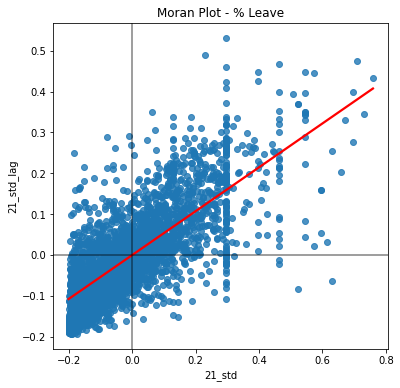

In [653]:
import seaborn

# Plot Moran's I
f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(
    x="21_std",
    y="21_std_lag",
    ci=None,
    data=db,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

In [1180]:
from esda.moran import Moran

w = Queen.from_dataframe(db)
moran = Moran(y, w)
moran.I

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 219, ' is an island (no neighbors)

c:\Users\Eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\weights\weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 541 disconnected components.
 There are 89 islands with ids: 0, 1, 2, 7, 14, 15, 18, 19, 24, 36, 46, 92, 97, 105, 108, 124, 172, 179, 197, 219, 245, 284, 310, 311, 326, 329, 358, 363, 364, 369, 374, 375, 414, 428, 475, 643, 648, 664, 669, 691, 692, 751, 758, 767, 776, 777, 836, 845, 854, 855, 862, 871, 880, 881, 940, 948, 962, 1037, 1062, 1086, 1093, 1102, 1145, 1152, 1159, 1160, 1161, 1168, 1175, 1182, 1193, 1277, 1345, 1351, 1356, 1393, 1394, 1406, 1415, 1442, 1449, 1490, 1525, 1544, 1551, 1552, 1553, 1558, 1559.



UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

In [612]:
l = list(zip(cleaned_list, pearson_r,b_stats, vals))

cdf = pd.DataFrame(l, columns=['R^2','Pearson',"Coeff",'values'])
cdf.to_csv('CoefficientAnalysis.csv')

[Text(0.5, 1.0, 'P vs 21')]

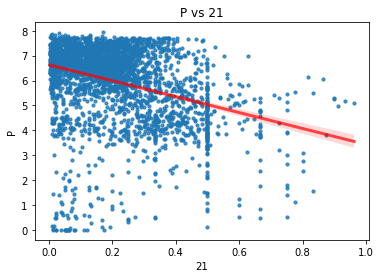

In [511]:
import seaborn as sns

# Simple Regression

y = 'Est P'
x = '21'
df1 = df[df[x] > 0]


sns.color_palette("light:#5A9", as_cmap=True)

sns.regplot(x=x, y=y, data=df1,scatter_kws={"s": 10}, line_kws={"color":"r","alpha":0.7,"lw":3}).set(title=str(y) + " vs " + str(x))



In [668]:
x = '24'

df1 = df[df[x] > 0]

g_y = df1['Est P'].values.reshape((-1, 1)) 
#df.to_csv('test.csv')
g_X = df1[[x]].values
df1['Lat'] = df1['geometry'].apply(lambda x: x.centroid.y)
df1['Lon'] = df1['geometry'].apply(lambda x: x.centroid.x)
u = df1['Lon'] # X
v = df1['Lat'] # Y
g_coords = list(zip(u, v))
g_X = (g_X - g_X.mean(axis = 0)) / g_X.std(axis = 0)
g_y = (g_y - g_y.mean(axis = 0)) / g_y.std(axis = 0)
#print(len(df['Est P']))


C:\Users\Eddie\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Eddie\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['11', '21', '22', '23', '24', '31', '41', '42', '43', '52', '71', '81',
       '82', '90', '95', 'num', 'DN', 'Est P', 'Max Temp', 'Avg Temp', 'D',
       'C', 'mu', 'D/mu', 'mu/C', 'geometry', 'index_right', 'Lat', 'Lon',
       'impervious', 'high developed', 'DC', 'Dmu', 'forest', 'crops',
       'wetlands'],
      dtype='object')
Est P
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]


mu
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]


C
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]


Avg Temp
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Eddie\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:673: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



D
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]


DC
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]


Dmu
DN


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]

,y,x,Min,Mean,Max,Morans I,P,% Significant,n,+(%),-(%)
0,Est P,DN,-2.408218,-0.535923,0.220295,0.030331,0.001,0.747250,4091,0.002689,0.744561
1,mu,DN,-0.306177,0.471147,1.944412,0.031217,0.001,0.715717,4091,0.709118,0.006600
2,C,DN,-3.317715,-0.057528,2.468357,0.012920,0.001,0.493033,4091,0.208506,0.284527
3,Avg Temp,DN,-2.224083,-0.528659,0.340430,0.037574,0.001,0.831337,4091,0.011000,0.820337
4,D,DN,-2.553471,-0.535487,0.252522,0.023958,0.043,0.679052,4091,0.001956,0.677096
5,DC,DN,-2.638430,-0.536900,0.194218,0.022891,0.090,0.661696,4091,0.000244,0.661452
6,Dmu,DN,-2.328884,-0.532694,0.324653,0.030526,0.001,0.745050,4091,0.012711,0.732339


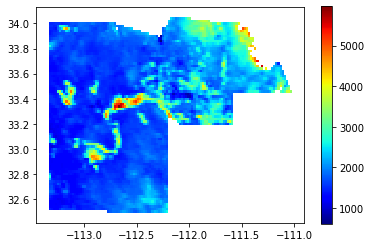

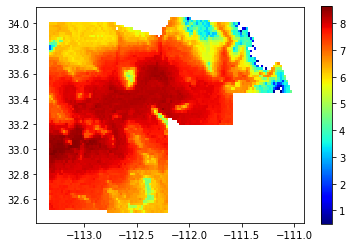

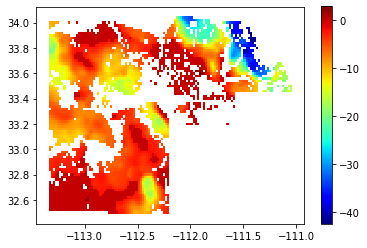

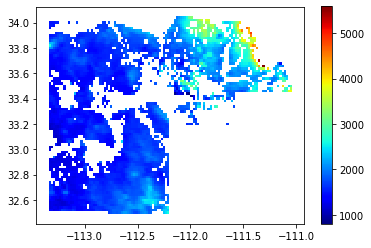

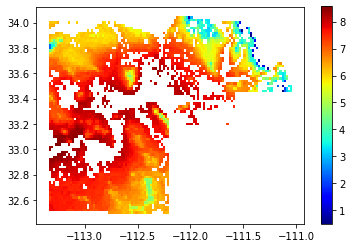

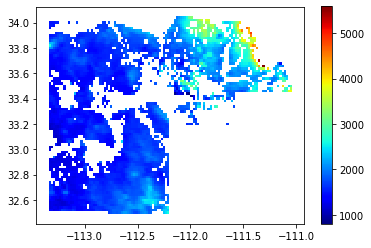

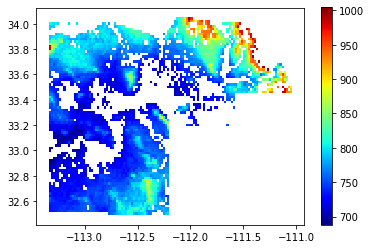

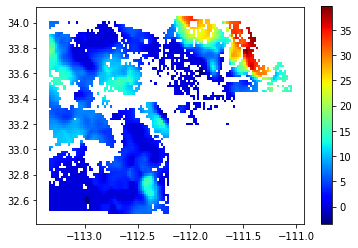

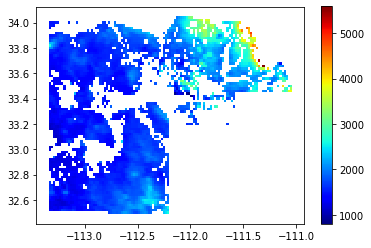

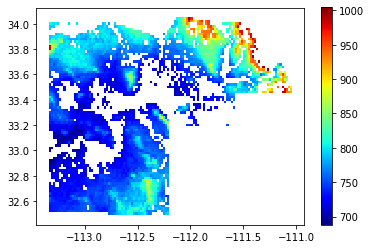

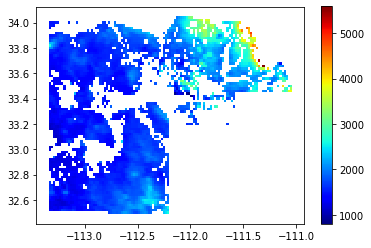

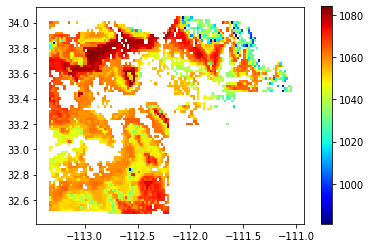

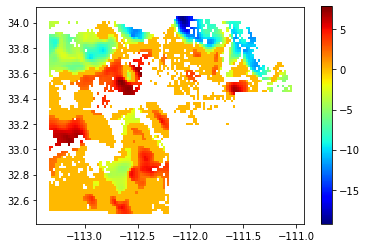

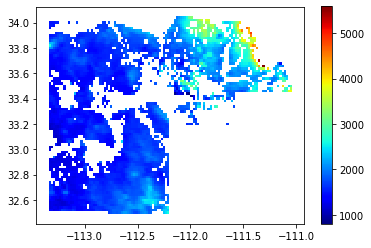

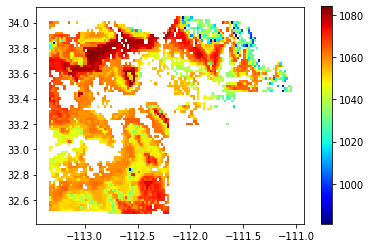

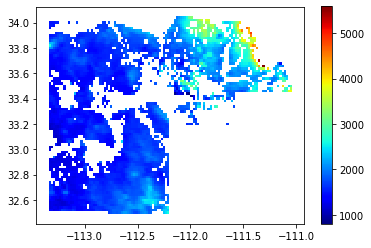

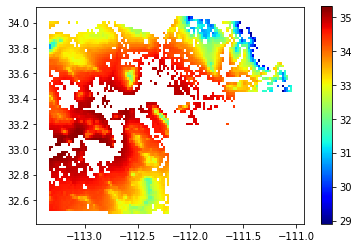

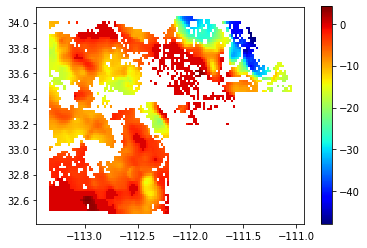

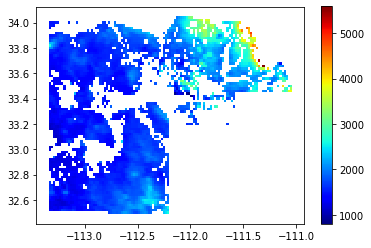

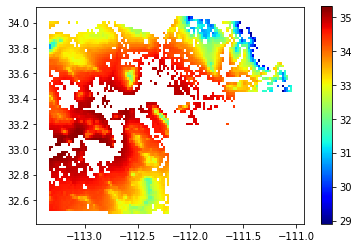

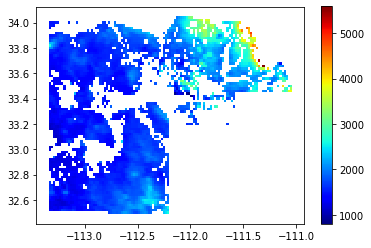

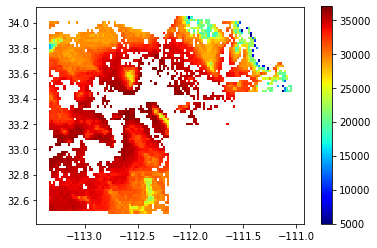

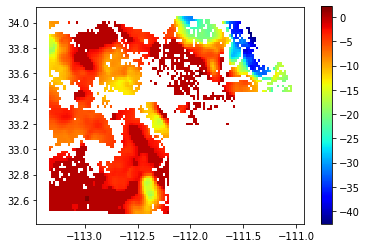

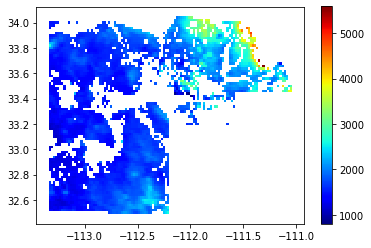

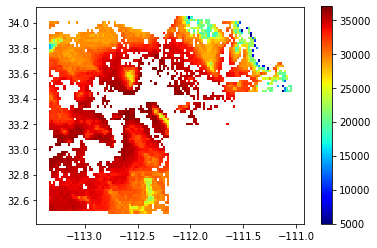

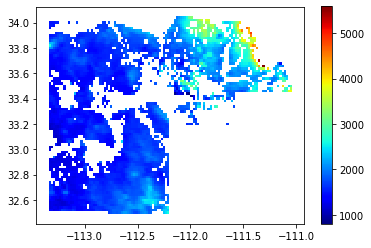

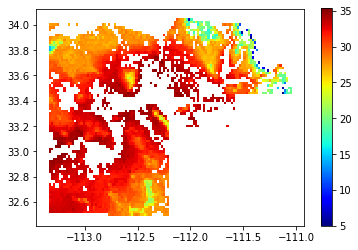

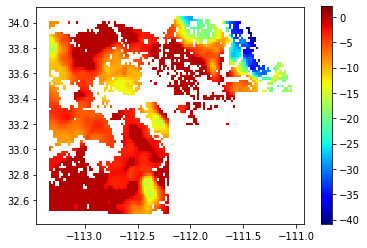

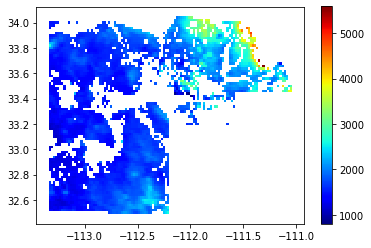

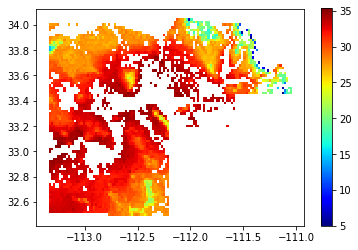

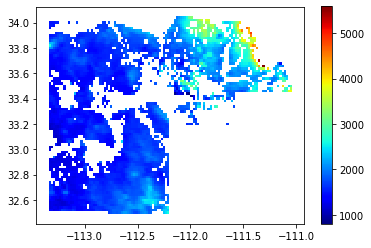

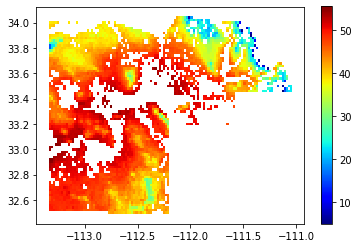

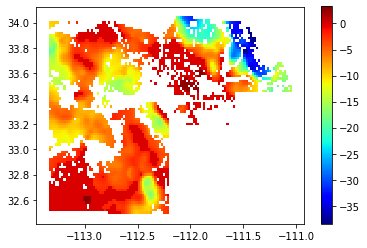

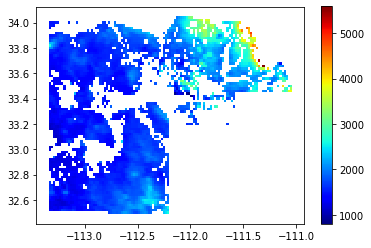

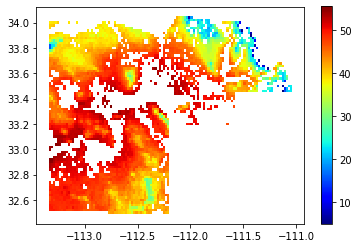

In [40]:
#dbtot = gpd.pd.concat([db, db1,csv_gdf])
import mgwr.sel_bw
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pysal
from mgwr.gwr import MGWR

# Use MGWR to determine regression coefficients.

vals = ['high developed']

ys = ['Est P','mu','C','Avg Temp','D','DC', 'Dmu']
total = ['wetlands','crops']
df['high developed'] = df['23'] + df['24']
df['DC'] = df['D']/df['C']
df['Dmu'] = df['D/mu']
df['forest'] = df['41'] + df['42']+ df['43']
df['crops'] = df['81'] + df['82']
df['wetlands'] = df['90'] + df['95']
df1 = df
df1 = df1.dropna()
print(df1.columns)
pd.set_option('mode.chained_assignment', None)
psignificant = []
coeffs = []
moran = []
p = []
min = []
mean = []
max = []
summaries = []
n = []
results = []
pos = []
neg = []
yvalues = []
xvalues = []
for k in range(len(ys)):
    for i in range(len(vals)):
        yvalues.append(ys[k])
        xvalues.append(vals[i])
        x = vals[i]
    #  w = KNN.from_dataframe(df1, k=10)
        #df1[x + '_lag'] = spatial_lag.lag_spatial(
    #      w, df1[x]
    # )
        df1.plot(df1[vals[i]], legend = True, cmap = 'jet')
        df1.plot(df1[ys[k]], legend = True, cmap = 'jet')
        df1 = df[df[x] > 0]
        df1 = df1.dropna()
        #print(df1[x])
        # prune values
        for l in range(len(total)):
            df1 = df1[df1[total[l]] <= 0]


        g_y = df1[ys[k]].values.reshape((-1, 1)) 
        #df.to_csv('test.csv')
        g_X = df1[[x]].values
        df1['Lat'] = df1['geometry'].apply(lambda x: x.centroid.y)
        df1['Lon'] = df1['geometry'].apply(lambda x: x.centroid.x)
        u = df1['Lon'] # X
        v = df1['Lat'] # Y
        g_coords = list(zip(u, v))
        g_X = (g_X - g_X.mean(axis = 0)) / g_X.std(axis = 0)
        g_y = (g_y - g_y.mean(axis = 0)) / g_y.std(axis = 0)
        #print(len(df['Est P']))


        
        '''
        # GWR
        gwr_selector = Sel_BW(g_coords, g_y, g_X,spherical=True)
        gwr_bw = gwr_selector.search()
        print(ys[k])
        print(vals[i])


        model = GWR(g_coords, g_y, g_X, gwr_bw)  
        gwr_results = model.fit()

        #print(gwr_results.resid_ss)
        #print(gwr_results.summary())
       # %%time

        gwr_filtered_t = gwr_results.filter_tvals(alpha = 0.05)
        df1['gwr_intercept'] = gwr_results.params[:, 0]
        df1[vals[i]+'gwr'] = gwr_results.params[:, 1]
        df1.plot(gwr_filtered_t[:, 1], legend = True, cmap = 'jet')
        df1.plot(df1[vals[i]], legend = True, cmap = 'jet')
        df1.plot(df1[ys[k]], legend = True, cmap = 'jet')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        print(gwr_results.summary())
        #print(gwr_results.tvalues.mean())
        #coeffs.append(gwr_results.pDev)
        plt.show()
        percentgood = len([x for x in gwr_filtered_t[:, 1] if x != 0])/len(gwr_results.params[:, 1])
        print(percentgood*100)'''
        #plt.savefig('../Figures/Phoenix/mapgwrmaricopa' + str(vals[i])+'.png')

        print(ys[k])
        print(vals[i])
        mgwr_selector = Sel_BW(g_coords, g_y, g_X, multi = True)
        mgwr_bw = mgwr_selector.search()
        model = MGWR(g_coords, g_y, g_X, mgwr_selector)
        mgwr_results = model.fit()
        n.append(mgwr_results.n)
        residuals = mgwr_results.resid_response

        # Create spatial weights matrix
        w = pysal.lib.weights.Kernel(g_coords)

        # Calculate Moran's I statistic
        moran_i = pysal.explore.esda.Moran(residuals, w)
        #coeffs.append()
        # Perform permutation test
        p_value = moran_i.p_sim

        #print('Moran\'s I statistic:', moran_i.I)
        print()
        #print('p-value:', p_value)
        p.append(p_value)
        moran.append( moran_i.I)
        results.append(mgwr_results)
        
        #summaries.append(mgwr_results.summary())

        mgwr_filtered_t = mgwr_results.filter_tvals(alpha=0.05)
        df1['mgwr_intercept'] = mgwr_results.params[:, 0]
        df1['value'] = mgwr_results.params[:, 1]
        min.append(np.min(np.array([i[1] for i in mgwr_results.params])))
        mean.append(np.array([i[1] for i in mgwr_results.params]).mean())
        max.append(np.max(np.array([i[1] for i in mgwr_results.params])))

        #print(mgwr_results.mu)
        m1 = df1.plot(mgwr_filtered_t[:, 1], legend = True, cmap = 'jet')
        plt.savefig('../../Figures/Phoenix/map'+ str(ys[k]) + str(vals[i])+'.png')
        
        m2 = df1.plot(df1[vals[i]], legend = True, cmap = 'jet')
        plt.savefig('../../Figures/Phoenix/'+ str(vals[i])+'.png')
        
        m3 = df1.plot(df1[ys[k]], legend = True, cmap = 'jet')
        plt.savefig('../../Figures/Phoenix/'+ str(ys[k]) + '.png')
        #ax.get_xaxis().set_visible(False)
       # ax.get_yaxis().set_visible(False)
        
        
        #plt.show()
        percentgood = len([x for x in mgwr_filtered_t[:, 1] if x != 0])/len(mgwr_results.params[:, 1])
       # print(percentgood*100)
        psignificant.append(percentgood)
        prop_pos = (mgwr_filtered_t[:, 1] > 0).sum() / len(mgwr_filtered_t[:, 1])
        prop_neg = (mgwr_filtered_t[:, 1] < 0).sum() / len(mgwr_filtered_t[:, 1])
        pos.append(prop_pos)
        neg.append(prop_neg)

l = list(zip(yvalues,xvalues,min,mean,max,moran,p,psignificant,n,pos,neg))
finalresults = pd.DataFrame(l,columns=['y','x','Min','Mean','Max','Morans I','P','% Significant','n',"+(%)","-(%)"])
finalresults

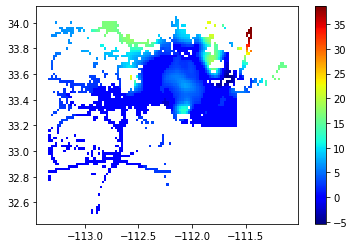

In [36]:
from matplotlib.colors import ListedColormap




heatmap = df1.plot(mgwr_filtered_t[:, 1], legend = True, cmap = 'jet')


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


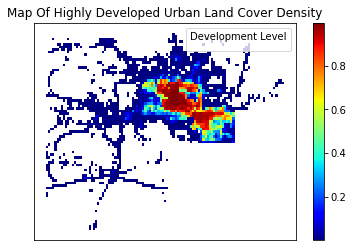

In [70]:

#finalresults = pd.DataFrame(l,columns=['Coefficients','Morans I','P','% Significant'])
df['high developed'] = df['23'] + df['24']
df1 = df[df['high developed'] > 0]
df1 = df1.dropna()
m1 = df1.plot('high developed', legend=True, cmap='jet')
m1.set_title("Map Of Highly Developed Urban Land Cover Density")
m1.legend(title='Development Level')

m1.get_xaxis().set_visible(False)
m1.get_yaxis().set_visible(False)
#plt.savefig('../Figures/Phoenix/map.png')

In [71]:

for i in range(len(results)):
    results[i].summary()
    mgwr_filtered_t = results[i].filter_tvals(alpha=0.05)
    prop_pos = (mgwr_filtered_t[:, 1] > 0).sum() / len(mgwr_filtered_t[:, 1])
    prop_neg = (mgwr_filtered_t[:, 1] < 0).sum() / len(mgwr_filtered_t[:, 1])
    print(prop_pos)
    print(prop_neg)
# Find which regressors are positive/negative

Model type                                                         Gaussian
Number of observations:                                                4091
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           1686.672
Log-likelihood:                                                   -3992.498
AIC:                                                               7988.997
AICc:                                                              7991.003
BIC:                                                             -32319.680
R2:                                                                   0.588
Adj. R2:                                                              0.588

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------